# Data Exploration

In this section, I explore the csv files to answer the following questions:

**Are there any data quality issues present?**

In the transactions table, every other row in the FINAL_QUANTITY column is 'zero' while the FINAL_SALE value for the corresponding columns is not empty. Conversely, the FINAL_SALE values for the corresponding rows where FINAL_QUANTITY values are >0 are empty (not even NULL, just blanks). I would consider this something to reach out to another team about (like AEs) to let them know there may be some upstream issues and that those data are not reliable in their current state.

There are some occasional NULL values across columns in all tables, but nothing hugely abnormal. It would be nice to have data for granular categories or all manufacturer data, for example. It's something I have brought up to Data Integrity teams before, but those NULL values are pretty common with large datasets and product/user/transaction data in my experience.

**Are there any fields that are challenging to understand?**

The transactions table, has both a PURCHASE_DATE as well as a SCAN_DATE. PURCHASE_DATE I can assume is the date of purchase for the item. But the SCAN_DATE, which can be on the PURCHASE_DATE or up to a few days later, I don't really know what it refers to. I can guess that it's the date that the receipt was 'accepted' or 'approved', but I would need to clarify to actually understand what it means.




#### Table of Contents
- [First Steps](#first_steps)
- [Explore Users Table](#explore_the_users_table)
- [Explore Transactions Table](#explore_the_transactions_table)
- [Explore Products Table](#explore_the_products_table)

<a id='first_steps'></a>
## First Steps
##### Let's start by installing some packages

In [90]:
#Import statements:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import sklearn as sk
import seaborn as sns

##### Import the datasets

In [66]:
#Read the data
users = pd.read_csv("//Users/sogolshirazi/Documents/Python Files/USER_TAKEHOME.csv")
products = pd.read_csv("//Users/sogolshirazi/Documents/Python Files/PRODUCTS_TAKEHOME.csv")
transactions = pd.read_csv("//Users/sogolshirazi/Documents/Python Files/TRANSACTION_TAKEHOME.csv")

##### First few rows of datasets

In [68]:
#Check the first few rows of the data
users.head()


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [69]:
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [70]:
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


<a id='explore_the_users_table'></a>
## Explore Users table


##### Check for duplicates in users table

In [71]:
# Check for id duplicates in user table and sort by id
duplicates = users[users.duplicated(subset=['ID'], keep=False)].sort_values(by='ID')
print("Duplicates found in ID:")
print(duplicates)

Duplicates found in ID:
Empty DataFrame
Columns: [ID, CREATED_DATE, BIRTH_DATE, STATE, LANGUAGE, GENDER]
Index: []


##### Gender Distribution

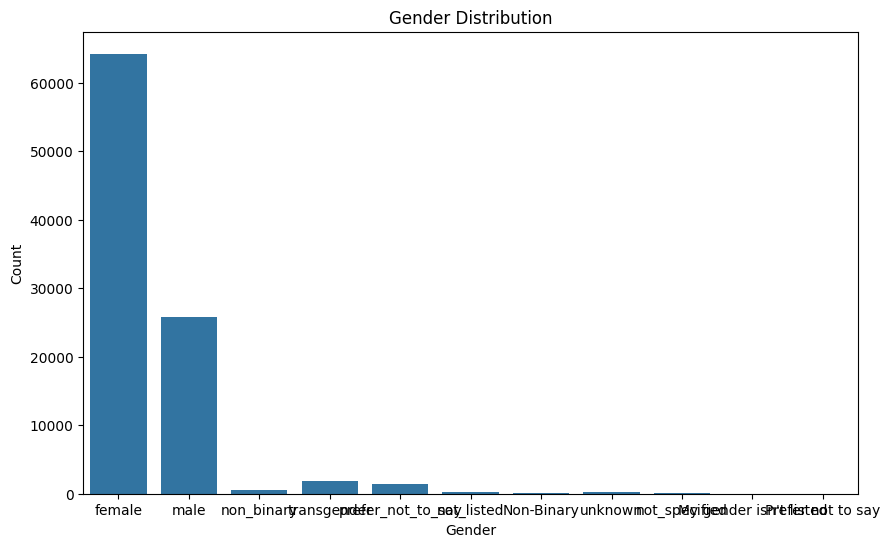

In [72]:
# Create a count plot for gender
plt.figure(figsize=(10, 6))
sns.countplot(data=users, x='GENDER')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### Age Distribution

In [78]:
# Convert BIRTH_DATE to datetime
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'])


# Calculate age
current_date = pd.to_datetime('today')
users['AGE'] = users['BIRTH_DATE'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Define age groups (buckets)
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
users['AGE_GROUP'] = pd.cut(users['AGE'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new age column
print(users)

                             ID              CREATED_DATE  \
0      5ef3b4f17053ab141787697d 2020-06-24 20:17:54+00:00   
1      5ff220d383fcfc12622b96bc 2021-01-03 19:53:55+00:00   
2      6477950aa55bb77a0e27ee10 2023-05-31 18:42:18+00:00   
3      658a306e99b40f103b63ccf8 2023-12-26 01:46:22+00:00   
4      653cf5d6a225ea102b7ecdc2 2023-10-28 11:51:50+00:00   
...                         ...                       ...   
99995  61fc06d41febf771966da8fa 2022-02-03 16:46:12+00:00   
99996  6391e7ef90ad5449ec5f782d 2022-12-08 13:34:39+00:00   
99997  637d5efdd6f2a49c49934dcb 2022-11-22 23:45:05+00:00   
99998  5f0de23b05d8a6147dc0cafa 2020-07-14 16:50:04+00:00   
99999  5e7ab436905e9512ff44abc8 2020-03-25 01:30:30+00:00   

                     BIRTH_DATE STATE LANGUAGE  GENDER   AGE AGE_GROUP  
0     2000-08-11 00:00:00+00:00    CA   es-419  female  24.0     19-25  
1     2001-09-24 04:00:00+00:00    PA       en  female  23.0     19-25  
2     1994-10-28 00:00:00+00:00    FL   es-419  

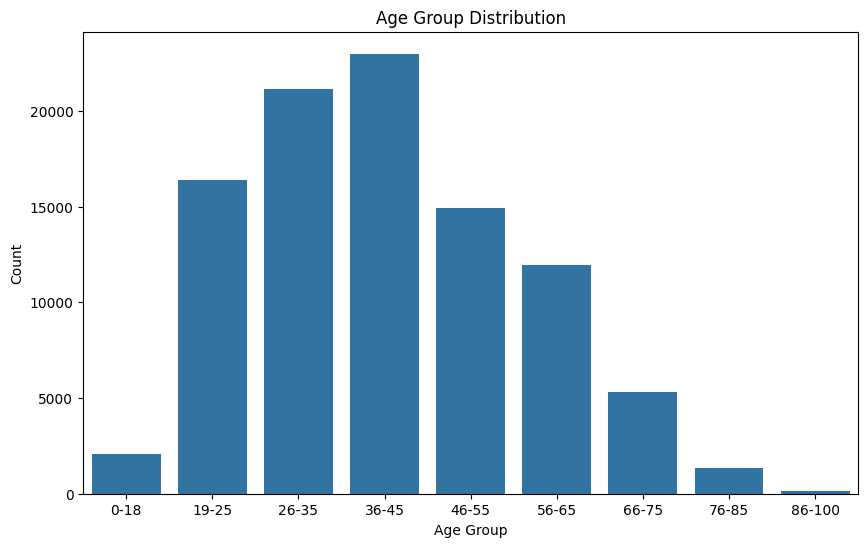

In [79]:
# Create a bar plot for age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=users, x='AGE_GROUP')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

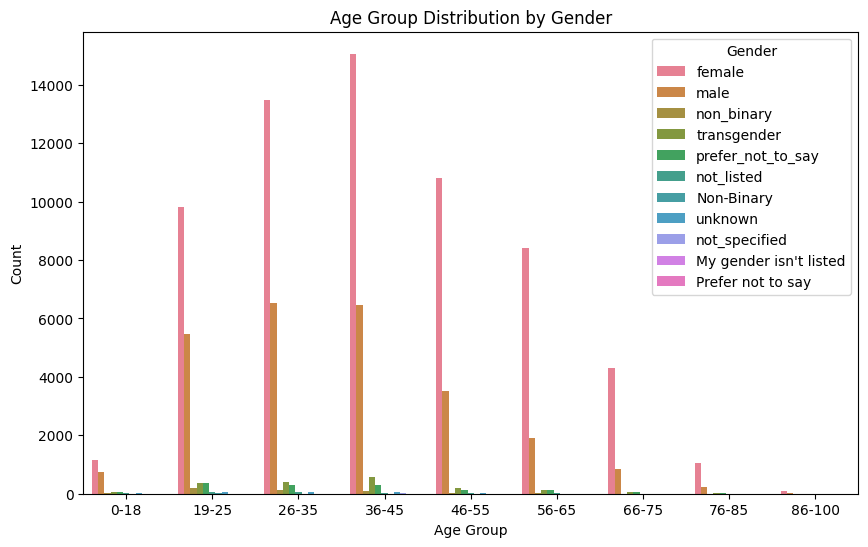

In [80]:
# Create a bar plot for age group distribution broken out by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=users, x='AGE_GROUP', hue='GENDER')
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<a id='explore_the_transactions_table'></a>
## Explore Transactions table

##### Looking at FINAL_QUANTITY

In [84]:
# Count the number of rows with the value "zero" in the FINAL_QUANTITY column
zero_final_quantity_count = transactions[transactions['FINAL_QUANTITY'] == 'zero'].shape[0]

print(f"Number of rows with the value 'zero' in the FINAL_QUANTITY column: {zero_final_quantity_count}")

Number of rows with the value 'zero' in the FINAL_QUANTITY column: 12500


##### Looking at number of purchases (number of RECEIPT_IDs) per month

     Month  Receipt_Count
0  2024-06          10854
1  2024-07          18576
2  2024-08          17124
3  2024-09           3446


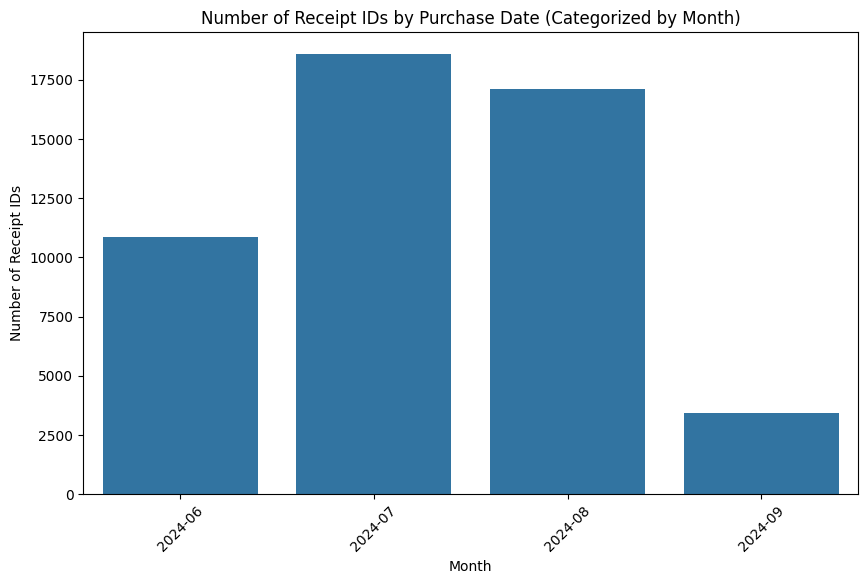

In [97]:
# Convert PURCHASE_DATE to datetime
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'])

# Extract month and year from PURCHASE_DATE
transactions['YEAR_MONTH'] = transactions['PURCHASE_DATE'].dt.to_period('M')

# Group by YEAR_MONTH and count the number of RECEIPT_IDs
receipt_counts = transactions.groupby('YEAR_MONTH')['RECEIPT_ID'].count().reset_index()

# Rename columns for clarity
receipt_counts.columns = ['Month', 'Receipt_Count']

# Display the DataFrame with the counts
print(receipt_counts)

# Create a bar plot for receipt counts by month
plt.figure(figsize=(10, 6))
sns.barplot(data=receipt_counts, x='Month', y='Receipt_Count')
plt.title('Number of Receipt IDs by Purchase Date (Categorized by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Receipt IDs')
plt.xticks(rotation=45)
plt.show()

<a id='explore_the_products_table'></a>
## Explore Products table

##### Looking at distribution of products (BARCODE) by primary category.

Obviously this is not ALL of the data in the products table, but I just wanted to get an idea of the categories and product distribution within them.

                 Category  Product_Count
11      Health & Wellness         510389
23                 Snacks         323195
6               Beverages           3978
20                 Pantry            867
2   Apparel & Accessories            840
7                   Dairy            592
18           Needs Review            547
0                 Alcohol            475
12          Home & Garden            115
8           Deli & Bakery             66


Text(0.5, 1.0, 'Top 10 Categories by Number of Products')

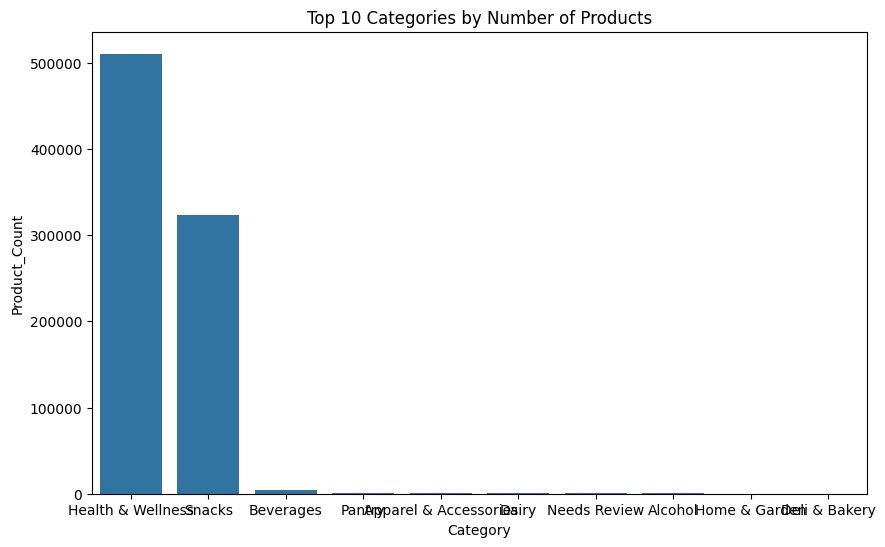

In [100]:
# Group by CATEGORY_1 and count the number of BARCODEs
category_counts = products.groupby('CATEGORY_1')['BARCODE'].count().reset_index()

# Rename columns for clarity
category_counts.columns = ['Category', 'Product_Count']

# Sort by Product_Count in descending order
category_counts = category_counts.sort_values(by='Product_Count', ascending=False)

# Filter to include only the top ten categories
top_ten_categories = category_counts.head(10)

# Display the DataFrame with the counts
print(top_ten_categories)

# Create a bar plot for product counts by category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ten_categories, x='Category', y='Product_Count')
plt.title('Top 10 Categories by Number of Products')